In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-multilearn==0.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 592.6 kB/s eta 0:00:00


In [ ]:
import tensorflow as tf

# Disable GPU (if available)
tf.config.set_visible_devices([], 'GPU')

# Or, you can specify the CPU device explicitly
# tf.config.set_visible_devices([], 'GPU:0')

# Now TensorFlow will use only the CPU

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.adapt import MLkNN
import sklearn.metrics as metrics
from sklearn.metrics import hamming_loss, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
import os

In [ ]:
os.chdir('/content/drive/MyDrive/ICON/Tamil')
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/.shortcut-targets-by-id/1i5k6Jb01kvneiUkS2K-1eZBVNfG0RVR4/Tamil': ['train_ta_l1.csv', 'glove', 'fasttext', 'tamil_train_combined - tamil_train.csv', 'train_ta_l1_final.gsheet', 'train_ta_l1_final - train_ta_l1.csv', 'tamil_MACD_Combined.csv', 'train_ta_l1_modded.gsheet', 'train_ta_l1_modded.csv', 'Fb_FastText', 'CNN_BiLSTM_ICON_Task-2_Tamil_Binary_Classification.h5', 'New_CNN+BiLSTM_Attempt-2_Tamil.ipynb', 'Tamil_Task2_output.csv']


In [ ]:
d2 = pd.read_csv('train_ta_l1_final - train_ta_l1.csv')
d2 = d2.drop(['key', 'ta_a1', 'ta_a2', 'ta_a3', 'ta_a4', 'ta_a5', 'ta_a6'], axis=1)
d2['Label'] = d2['Label'].astype(int)
d2 = d2[['Label', 'text']]
d2

,Label,text
0,0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி நி...
1,0,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக்கு...
2,0,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா
3,1,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆
4,1,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ஒவ...
...,...,...
6774,1,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭
6775,0,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...
6776,0,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...
6777,0,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...


The label column is created in the original training dataset by taking the majority occurence of 0 or 1 among all the 6 annotators in columns - 'ta_a1', 'ta_a2', 'ta_a3', 'ta_a4', 'ta_a5', 'ta_a6'.

In [ ]:
d2.rename(columns = {'Label':'label'}, inplace = True)
d2

,label,text
0,0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி நி...
1,0,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக்கு...
2,0,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா
3,1,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆
4,1,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ஒவ...
...,...,...
6774,1,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭
6775,0,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...
6776,0,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...
6777,0,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...


In [ ]:
df=d2
df

,label,text
0,0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி நி...
1,0,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக்கு...
2,0,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா
3,1,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆
4,1,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ஒவ...
...,...,...
6774,1,😭😭😭 ஒம்மாள படிக்கல் புண்ட 😭😭😭
6775,0,🙄🙄🙄🙄 என்ன எழவுயா இது... இதெல்லாம் ஒரு பெருமை...
6776,0,🚨எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ள...
6777,0,🤣 🤣 சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்...


## Word Pre-Processing

In [ ]:
## Word Pre-Processing ##
import nltk
import string
import re

## Function to normalize text for pre-processing ##
def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text


In [ ]:
## Apply the written function ##
df['text'] = df['text'].apply(lambda x: normalize_text(x))
df

,label,text
0,0,முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி நி...
1,0,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக்கு...
2,0,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா
3,1,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும்
4,1,என்ன உடம்பு டா சாமி சும்மா வளுவளுனு முலை ஒவ...
...,...,...
6774,1,ஒம்மாள படிக்கல் புண்ட
6775,0,என்ன எழவுயா இது இதெல்லாம் ஒரு பெருமைனு ந...
6776,0,எக்ஸ் பிரஸ் பேர்ல் கப்பல் தீ விபத்துக்கு உள்ளா...
6777,0,சல்லி ஜாதி வெறி முட்டா புண்ட உங்க பொண்ணுங்க ...


# Train Test Splits

In [ ]:
X = list(df['text'])
#y = np.asarray(d1[d1.columns[1:]])
y_data = df['label']
y = y_data.values

In [ ]:
len(X)

6779

In [ ]:
y.size

6779

In [ ]:
X

['    முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி நிலம் இல்லை என்பதை நிரூபிக்க   ஆம் ஆண்டு வாங்கப்பட்ட பட்டாவை ஆதாரமாகக் காட்டியிருக்கிறார் மு க ஸ்டாலின்   இதற்கு காட்ட வேண்டிய   ',
 'சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக்கு பேச்சு புண்டையை  பாரு     போய் சீனா காரனுக்கு சூத்து குடு போ',
 'தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா',
 'பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் ',
 'என்ன உடம்பு டா சாமி  சும்மா வளுவளுனு   முலை ஒவ்வொன்னும் தேங்காய் போல   நடிகை மாளவிகாவின் லேட்டஸ்ட் போட்டோஷூட்',
 'கதற விட்ட புலம் பெயர் உறவுகள் கதி கலங்கி போன கோத்தா பையன்',
 'பத்தினி வேச பு   வேற எடத்துல காட்டு இங்குட்டு ஒரு உருட்டு அங்குட்டு நல்லவன் வேசம் ஆ மூடிட்டு போடா மயிரு   \u200d',
 '  உன்னைய தூக்கி போட்டு நா ஓக்க   ',
 ' ஆடு திருடுனதுக்கு எப்பிடியும் தண்டனை கிடைச்சிரும்னு பயந்து ஆட்டைக்கூட ஒளிச்சி வச்சிட்டேன்          அப்புறம்         பக்கத்து தெருவுல கோழி திருடுனவனை ஏன் கைது செய்யலைன்னு சொல்லி ஜட்ஜய்யா என்னை விடுதலை செஞ்சிட்டாரு          ',
 ' ஊரடங்கால்   கோடிக்கு மேல் இழப்பு    சதீஷ்  பிராய்லர் க

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

# Model CNN & Bi-LSTM

In [ ]:
#Model CNN & Bi-LSTM
import keras
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM
# from keras.layers.recurrent import LSTM
# from keras.layers.core import Activation, Dropout, Dense
from keras.layers import LSTM, Activation, Dropout, Dense, Flatten, Bidirectional, GRU, concatenate, SpatialDropout1D

from keras.layers import Flatten, LSTM
from keras.layers import Bidirectional,GRU,concatenate,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D,Conv1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate
import matplotlib.pyplot as plt
from keras import layers
from keras.optimizers import Adam,SGD,RMSprop
from keras.losses import MeanSquaredError
######## Textual Features for Embedding ###################
# max_len = 100
# max_features = 10000
# embed_size = 300
# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(list(X))
# X = tokenizer.texts_to_sequences(X)
# X = pad_sequences(X, padding='post', maxlen=max_len)

# Define model parameters
max_seq_length = 100  # Maximum sequence length for input posts (up to 70 words)
max_features = 33064

# Load pre-trained fastText Bengali embeddings
embedding_dim = 300  # Dimensionality of word embeddings
embedding_path = '/content/drive/MyDrive/ICON/Tamil/Fb_FastText/cc.ta.300.vec'

# Tokenization
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, padding='post', maxlen=max_seq_length)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
X

array([[ 1557,  2466,  5573, ...,     0,     0,     0],
       [ 1396,   323,  5574, ...,     0,     0,     0],
       [ 5575,  5575,   135, ...,     0,     0,     0],
       ...,
       [ 8512,  3879,  8513, ...,     0,     0,     0],
       [  406,   430,   602, ...,     0,     0,     0],
       [    4,   850, 33055, ...,     0,     0,     0]], dtype=int32)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# Read the pre-trained embedding vectors from .vec file
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
with open(embedding_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().split()
        word = values[0]
        if word in word_index:
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_matrix[word_index[word]] = coefs

# Model Training

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D, GlobalAveragePooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Load your data, assuming you have a DataFrame 'df' with 'text' and 'label' columns
# Ensure that the 'label' column contains 'neither,' 'racist,' or 'sexist'

# Split your data into features (X) and labels (y)
# X = d2['text'].values
# y = d2['label'].values

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store classification reports for each fold
classification_reports = []
# Initialize lists to store metrics for each fold
precision_list = []
recall_list = []
f1_score_list = []

# # Define the maximum number of words to consider in the text
# max_words = 10000

# # Tokenize the text data
# tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
# tokenizer.fit_on_texts(X)

# # Convert text data to sequences
# X_sequences = tokenizer.texts_to_sequences(X)

# # Define the maximum sequence length (adjust as needed)
# max_sequence_length = 100

# Convert labels to categorical (one-hot encoding)
# y_encoded = to_categorical(y, num_classes=3)

# Iterate through the folds
# import pdb;pdb.set_trace()
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Define the model architecture
    sequence_input = Input(shape=(max_seq_length, ))
    x = Embedding(max_features, embedding_dim, weights=[embedding_matrix],trainable = False)(sequence_input)
    x = SpatialDropout1D(0.2)(x) ## ostly drops the entire 1D feature map rather than individual elements.
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    # x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    #x = Conv1D(16, kernel_size = 2, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    x = Bidirectional(LSTM(128, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    x = Dense(128,activation='relu')(avg_pool)
    x = Dropout(0.2)(x)
    preds = Dense(2, activation="softmax")(x)
    model = Model(sequence_input, preds)
    # model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-3),metrics=['acc'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     model = Sequential()
#     model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
#     model.add(SpatialDropout1D(0.2))
#     model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.1)))
#     model.add(GlobalAveragePooling1D())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(3, activation="softmax"))

#     # Compile the model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    epochs = 5
    batch_size = 32
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model on the validation data
    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)

#     # Generate and store the classification report for this fold
#     report = classification_report(y_val_labels, y_pred_labels, target_names=['neither', 'racist', 'sexist'])
#     classification_reports.append(report)

#     print(f'Fold {fold + 1} - Classification Report:\n{report}\n')

# # Print the average classification report across all folds
# average_report = '\n'.join(classification_reports)
# print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')
     # Generate the classification report for this fold
    report = classification_report(y_val_labels, y_pred_labels, target_names=['Hate', 'Not Hate'], output_dict=True)

    # Extract precision, recall, and f1-score
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_score_list.append(report['weighted avg']['f1-score'])

    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_val_labels, y_pred_labels, target_names=["Hate", "Not Hate"])}\n')

# Calculate the average precision, recall, and f1-score across all folds
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1_score = np.mean(f1_score_list)

# Display the average classification report
average_report = f'Average Precision: {average_precision:.2f}\nAverage Recall: {average_recall:.2f}\nAverage F1-Score: {average_f1_score:.2f}'
print(f'Average Classification Report Across {n_splits} Folds:\n{average_report}')

Epoch 1/5
106/106 [==============================] - 76s 647ms/step - loss: 0.6240 - accuracy: 0.6601 - val_loss: 0.5417 - val_accuracy: 0.7047
Epoch 2/5
106/106 [==============================] - 66s 621ms/step - loss: 0.5870 - accuracy: 0.6834 - val_loss: 0.5465 - val_accuracy: 0.7265
Epoch 3/5
106/106 [==============================] - 62s 579ms/step - loss: 0.5505 - accuracy: 0.7241 - val_loss: 0.5773 - val_accuracy: 0.6805
Epoch 4/5
106/106 [==============================] - 64s 608ms/step - loss: 0.5463 - accuracy: 0.7265 - val_loss: 0.5304 - val_accuracy: 0.7375
Epoch 5/5
106/106 [==============================] - 8s 69ms/step
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.79      0.74      0.77      1942
    Not Hate       0.68      0.74      0.71      1448

    accuracy                           0.74      3390
   macro avg       0.74      0.74      0.74      3390
weighted avg       0.75      0.74      0.74      3390


In [ ]:
model.save('/content/CNN_BiLSTM_ICON_Task-3_Tamil_Binary_Classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


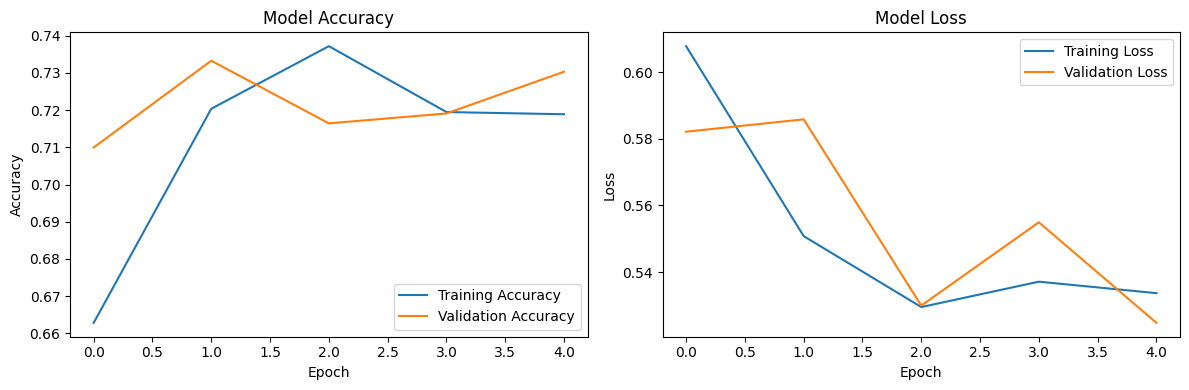

In [ ]:
# Assuming you have trained your model and have a `history` object
# after fitting the model

import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Assuming you have `y_val_labels` and `y_pred_labels` as the true and predicted labels

# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels, y_pred_labels, average='weighted')
precision = precision_score(y_val_labels, y_pred_labels, average='weighted')
recall = recall_score(y_val_labels, y_pred_labels, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)

F1 Score: 0.7287274640958749
Precision: 0.7605272790412656
Recall: 0.7303039244614931
{'Hate': {'precision': 0.8510174418604651, 'recall': 0.622872340425532, 'f1-score': 0.7192874692874693, 'support': 1880}, 'Not Hate': {'precision': 0.6477893691008445, 'recall': 0.8641484426772698, 'f1-score': 0.7404883588869962, 'support': 1509}, 'accuracy': 0.7303039244614931, 'macro avg': {'precision': 0.7494034054806549, 'recall': 0.7435103915514009, 'f1-score': 0.7298879140872327, 'support': 3389}, 'weighted avg': {'precision': 0.7605272790412656, 'recall': 0.7303039244614931, 'f1-score': 0.7287274640958749, 'support': 3389}}


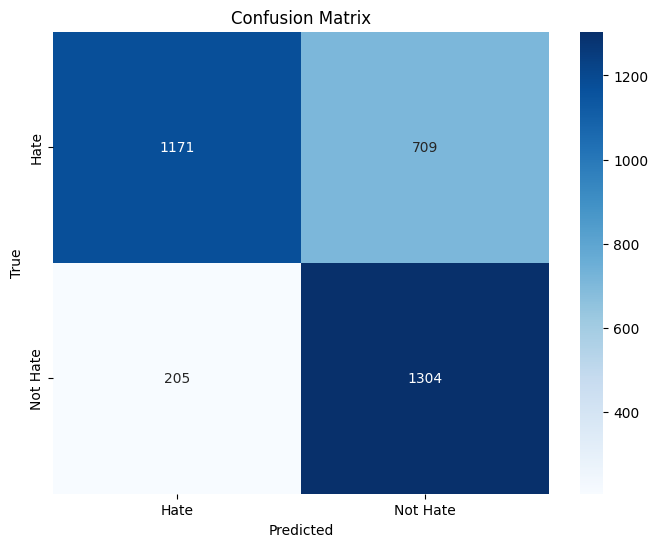

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# y_true = true_labels
# y_pred = predicted_labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Hate','Not Hate'],
            yticklabels=['Hate','Not Hate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Testing on Unseen Data

In [ ]:
vv= pd.read_csv('/content/test_label1.csv')
vv

,id,text,language,key
0,1,"""who's this tweet about"" bitch it's about you ...",english,question_1
1,2,#AlkaLamba should’ve used her slippers to slap...,english,question_1
2,3,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,english,question_1
3,4,"(Acts 29:19994) LIKE the female ""governors"" of...",english,question_1
4,5,***Let us celebrate “secular” as a beautiful w...,english,question_1
...,...,...,...,...
3753,3754,😂😂😂 ஊம்பு,tamil,question_1
3754,3755,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",tamil,question_1
3755,3756,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,tamil,question_1
3756,3757,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,tamil,question_1


In [ ]:
vv = vv[vv['language'] == 'tamil']
vv

,id,text,language,key
2623,2624,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,tamil,question_1
2624,2625,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,tamil,question_1
2625,2626,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,tamil,question_1
2626,2627,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,tamil,question_1
2627,2628,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,tamil,question_1
...,...,...,...,...
3753,3754,😂😂😂 ஊம்பு,tamil,question_1
3754,3755,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",tamil,question_1
3755,3756,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,tamil,question_1
3756,3757,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,tamil,question_1


In [ ]:
vv1 = vv
vv1

,id,text,language,key
2623,2624,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,tamil,question_1
2624,2625,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,tamil,question_1
2625,2626,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,tamil,question_1
2626,2627,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,tamil,question_1
2627,2628,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,tamil,question_1
...,...,...,...,...
3753,3754,😂😂😂 ஊம்பு,tamil,question_1
3754,3755,"😄 தமிழ் தெரிஞ்சவன்""தான் உங்கொம்மால குண்டி அடிக...",tamil,question_1
3755,3756,😅😅😂😂 நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு.. 😎...,tamil,question_1
3756,3757,😺✏ — ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ...,tamil,question_1


In [ ]:
## Word Pre-Processing ##
import nltk
import string
import re

## Function to normalize text for pre-processing ##
def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text
## Apply the written function ##
vv1['text'] = vv1['text'].apply(lambda x: normalize_text(x))
vv1

<ipython-input-48-01992e7e1f18>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vv1['text'] = vv1['text'].apply(lambda x: normalize_text(x))


,id,text,language,key
2623,2624,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,tamil,question_1
2624,2625,valimai ajithkumar ஏண்டா குள்ள புண்டைக...,tamil,question_1
2625,2626,ambedkarblueshirtrally இந்த போராட்டத்துக்கு ...,tamil,question_1
2626,2627,breaking திருச்சி மாவட்டம் மணப்பாறையை அடுத...,tamil,question_1
2627,2628,bachelor படமாடா இது கோத்தா,tamil,question_1
...,...,...,...,...
3753,3754,ஊம்பு,tamil,question_1
3754,3755,தமிழ் தெரிஞ்சவன் தான் உங்கொம்மால குண்டி அடிக்...,tamil,question_1
3755,3756,நீ தான் பங் அவனோலுக்கு கரெக்டா ஆன ஆளு லத்த...,tamil,question_1
3756,3757,— ஆமாம் வேச ஆமாம் வேச அய்ம் ச்லீபின் அய்ம் ச்...,tamil,question_1


In [ ]:
######## Textual Features for Embedding ###################

sequence = tokenizer.texts_to_sequences(vv1.text)
sequence = pad_sequences(sequence, padding='post', maxlen=max_seq_length)

In [ ]:
sequence = tokenizer.texts_to_sequences(vv1['text']) # same tokenizer which is used on train data.
sequence = pad_sequences(sequence,padding='post', maxlen = max_seq_length)

predictions = model.predict(sequence)
classes=np.argmax(predictions,axis=1)

36/36 [==============================] - 4s 106ms/step


In [ ]:
predictions


array([[0.3202512 , 0.6797487 ],
       [0.39385137, 0.6061487 ],
       [0.85223526, 0.14776476],
       ...,
       [0.30137563, 0.6986244 ],
       [0.76338834, 0.23661163],
       [0.68694234, 0.3130577 ]], dtype=float32)

In [ ]:
pred = np.argmax(predictions, axis=1)
pred

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
ids = np.arange(2624, 3759)
# Create a DataFrame with 'id' and 'value' columns
result_df = pd.DataFrame({'id': ids, 'value': pred})
# result_df = pd.DataFrame({'value': predictions})
result_df

,id,value
0,2624,1
1,2625,1
2,2626,0
3,2627,0
4,2628,1
...,...,...
1130,3754,1
1131,3755,1
1132,3756,1
1133,3757,0


In [ ]:
# Save the DataFrame to a CSV file
result_df.to_csv('/content/Tamil_Task3_output.csv', index=False)

Similarly, the output for test_label3.csv is found by simply changing the path.
